Mean Squared Error: 1.2027405175862467
Mean Absolute Error: 0.8332494355132001
R² Score: 0.3280734980760681


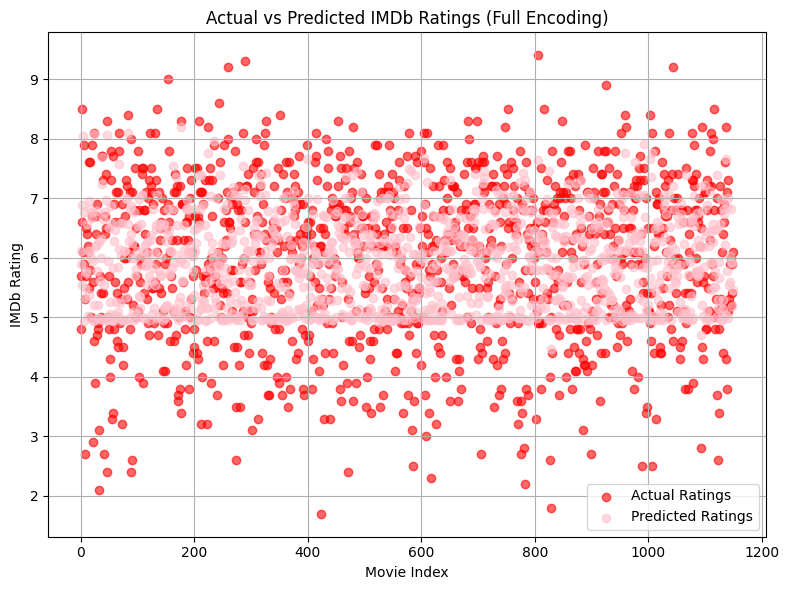

In [2]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2. Load Dataset
df = pd.read_csv("IMDb Movies India.csv", encoding='latin1')

# 3. Initial Cleaning
df_clean = df.copy()
df_clean.dropna(subset=['Rating'], inplace=True)
df_clean.columns = df_clean.columns.str.strip()

# 4. Convert 'Year' and 'Duration' to numeric
df_clean['Year'] = df_clean['Year'].str.extract('(\d{4})').astype(float)
df_clean['Duration'] = df_clean['Duration'].str.extract('(\d+)').astype(float)

# 5. Drop rows with missing essential values
df_clean.dropna(subset=['Genre', 'Director', 'Actor 1', 'Rating'], inplace=True)

# ✅ 6. Fix 'Votes' column
df_clean['Votes'] = df_clean['Votes'].astype(str).str.replace(',', '').astype(float)

# 7. One-Hot Encode All Categories (No limits)
df_model_full = df_clean[['Genre', 'Director', 'Actor 1', 'Year', 'Duration', 'Votes', 'Rating']].copy()
df_model_full = pd.get_dummies(df_model_full, columns=['Genre', 'Director', 'Actor 1'], drop_first=True)

# 8. Drop Remaining NaNs if Any
df_model_full.dropna(inplace=True)

# 9. Split Data
X = df_model_full.drop('Rating', axis=1)
y = df_model_full['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 10. Train Model
model = RandomForestRegressor(n_estimators=10, max_depth=8, random_state=42)
model.fit(X_train, y_train)

# 11. Evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# 12. Visualize Predictions

plt.figure(figsize=(8, 6))

# Plot actual values
plt.scatter(range(len(y_test)), y_test, color='Red', label='Actual Ratings', alpha=0.6)

# Plot predicted values
plt.scatter(range(len(y_pred)), y_pred, color='Pink', label='Predicted Ratings', alpha=0.6)

plt.xlabel("Movie Index")
plt.ylabel("IMDb Rating")
plt.title("Actual vs Predicted IMDb Ratings (Full Encoding)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

